# Importing the libaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Importing the dataset

In [ ]:
dataset = np.loadtxt(fname='data2.txt', delimiter=',')
X = dataset[:, :-1]
y = dataset[:, -1]
x_plot = X
y_plot = y

# Visualizing the dataset

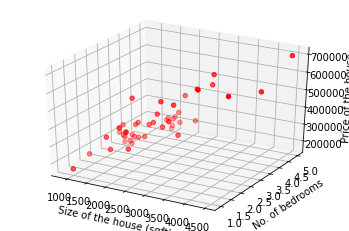

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.set_xlabel('Size of the house (sqft)')
axes.set_ylabel('No. of bedrooms')
axes.set_zlabel('Price of the house')
Axes3D.scatter(axes,X[:, 0], X[:, 1], y, color='red')
plt.show()

# Preprocessing

In [ ]:
# Feature Scaling
X[:, 0] = (X[:, 0] - np.mean(X[:, 0]))/np.std(X[:, 0])
X[:, 1] = (X[:, 1] - np.mean(X[:, 1]))/np.std(X[:, 1])
y = (y - np.mean(y))/np.std(y)

In [ ]:
# Adding a column of 1's to the dataset for vector implementation
X = np.column_stack((np.ones((len(X), 1)), X))

In [ ]:
# Making sure that the vector is properly shaped to make sure that no error occurs
y = y.reshape((len(y), 1))

# Initialize weights

In [ ]:
Weights = np.random.randn(X.shape[1], 1)

# cost function

In [ ]:
def cost(X, y, Weights):
  m = len(X)

  J = (1/(2*m))*(np.sum(np.square((np.dot(X, Weights) - y))))

  return J

# Gradient function

In [ ]:
def gradient(X, y, Weights):
  m = X.shape[0]
  n = X.shape[1]

  grad = np.zeros((n, 1))

  for i in range(n):
    grad[i] = (1/m)*(np.sum((np.dot(X, Weights) - y) * X[:, i].reshape((m, 1))))

  return grad

# model

In [ ]:
alpha = 0.01            # Learning rate parameter
num_iter = 500          # Num of iterations
n = X.shape[1]
J_hist = np.ones((num_iter, 1))     

# We're going to be using batch gradient descent
for i in range(num_iter):
  grad = gradient(X, y, Weights)
  
  for j in range(n):
    Weights[j] = Weights[j] - alpha*grad[j]

  J_hist[i] = cost(X, y, Weights)

# Cost Vs No. of iterations

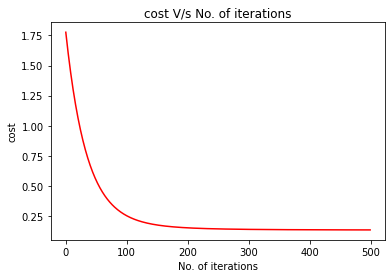

In [ ]:
# This help us determine whether our algorithm is working properly or not,
# and whether the model is converging or not.
# the cost should decrease with every iteration.

iterations = [i for i in range(num_iter)]
plt.plot(iterations, J_hist, color='red')
plt.title('cost V/s No. of iterations')
plt.xlabel('No. of iterations')
plt.ylabel('cost')
plt.show()